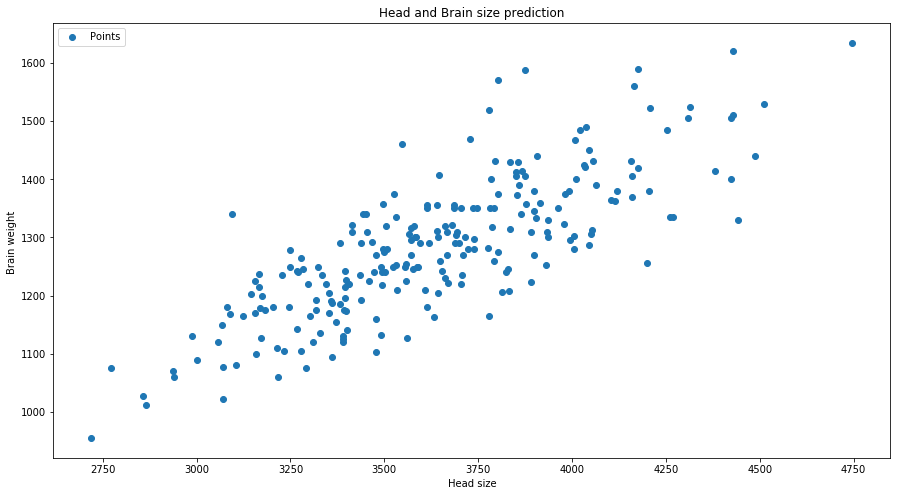

In [3]:
import pandas as pd
import matplotlib.pyplot as pl
data=pd.read_csv("brain.csv")
dataa=data.loc[:,["size","wt"]]
pl.figure(figsize=(15,8))
pl.scatter(dataa["size"],dataa["wt"])
pl.legend(["Points"],loc="best")
pl.title("Head and Brain size prediction")
pl.xlabel("Head size")
pl.ylabel("Brain weight ")
pl.show()

189 48 189 48
Y intercept [302.32024462]
Coefficient [[0.27016486]]
Least squared error 0.65944320736707
Mean Absolute Error: 60.39921498873023
Mean Squared Error: 6458.352022732567
Root Mean Squared Error: 80.36387262154909


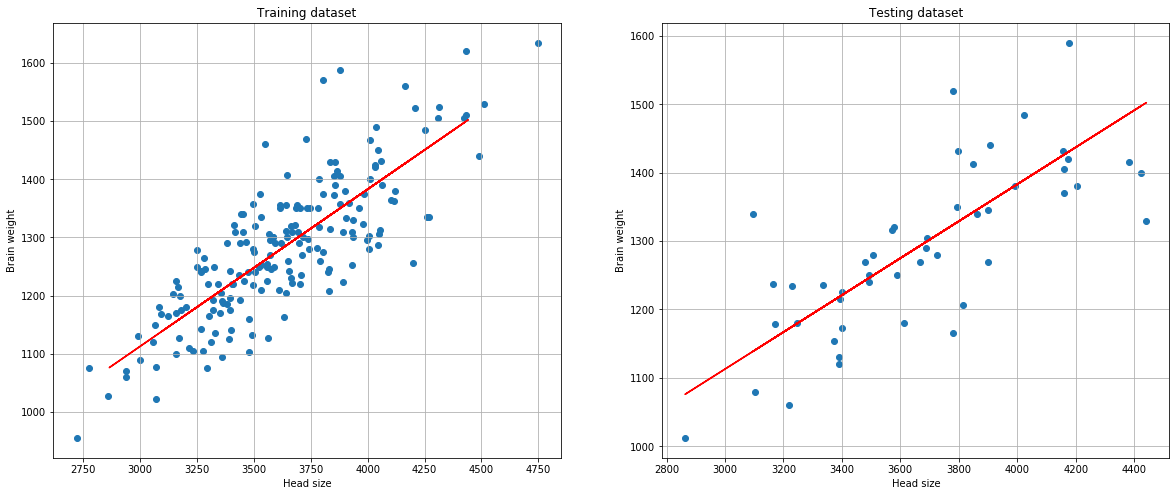

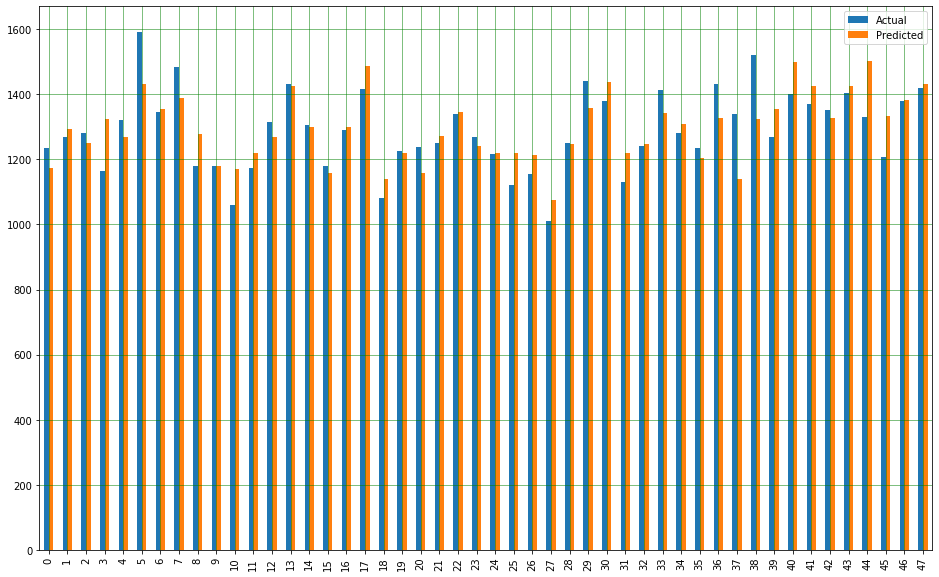

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x=dataa["size"].values.reshape(-1,1)
y=dataa["wt"].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.size,x_test.size,y_train.size,y_test.size)
regresser=LinearRegression()

regresser.fit(x_train,y_train)

# regresser.fit(x,y)

print("Y intercept",regresser.intercept_)
print("Coefficient",regresser.coef_)
y_pred=regresser.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

print("Least squared error",regresser.score(x_train,y_train))
pl.figure(figsize=(20,8))

pl.subplot(1,2,1)
pl.scatter(x_train,y_train)
pl.plot(x_test,y_pred,color="r")
pl.xlabel("Head size")
pl.grid()
pl.ylabel("Brain weight")
pl.title("Training dataset")

pl.subplot(1,2,2)
pl.scatter(x_test,y_test)
pl.plot(x_test,y_pred,color="r")
pl.title("Testing dataset")
pl.xlabel("Head size")
pl.grid()
pl.ylabel("Brain weight")

df.plot(kind='bar',figsize=(16,10))
pl.grid(which='major', linestyle='-', linewidth='0.5', color='green')
pl.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))